### How do interest rates vary across states?

In [1]:
import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.core import datetools
%matplotlib inline
pd.set_option('display.max_columns', None);

/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


Can't read in the full file "../data/LoanStats3.csv" so I made my own file "LoanStats3a_BP_edits.xls" that only has the columns "loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "int_rate", "installment", "grade", "sub_grade", "zip_code", "addr_state".

In [31]:
#read in accepted loan data
accepted_loans_df = pd.read_excel("../data/LoanStats3a_BP_edits.xls", sheet_name="Sheet1");

In [32]:
#take a quick peek to make sure data was read in properly
print(accepted_loans_df.shape);
display(accepted_loans_df.head())

(42538, 10)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,zip_code,addr_state
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,860xx,AZ
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,309xx,GA
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,606xx,IL
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,917xx,CA
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,972xx,OR


In [33]:
#look at summary stats for continuous variables
accepted_loans_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000
mean,11089.722581,10821.585753,10139.938785,0.121650,322.623063
std,7410.938391,7146.914675,7131.598014,0.037079,208.927216
min,500.000000,500.000000,0.000000,0.054200,15.670000
25%,5200.000000,5000.000000,4950.000000,0.096300,165.520000
50%,9700.000000,9600.000000,8500.000000,0.119900,277.690000
75%,15000.000000,15000.000000,14000.000000,0.147200,428.180000
max,35000.000000,35000.000000,35000.000000,0.245900,1305.190000


In [34]:
accepted_loans_df.dtypes

loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
int_rate           float64
installment        float64
grade               object
sub_grade           object
zip_code            object
addr_state          object
dtype: object

In [62]:
state_groupby = accepted_loans_df.groupby('addr_state').agg({
    'loan_amnt': np.mean,
    'funded_amnt': np.mean,
    'int_rate': [np.mean, np.std],
});
display(state_groupby)

loan_amnt   funded_amnt  int_rate          
                    mean          mean      mean       std
addr_state                                                
AK          12913.953488  12677.325581  0.128609  0.041164
AL          11173.295455  10913.274793  0.119634  0.036651
AR          10369.827586  10073.467433  0.117544  0.037576
AZ          10889.040729  10600.160772  0.123322  0.038345
CA          11283.601427  11007.023153  0.122198  0.036295
CO          11190.985998  10939.264877  0.119419  0.036608
CT          11320.955882  11075.674020  0.120263  0.037324
DC          12329.575893  11929.017857  0.121209  0.034466
DE          10181.801471   9995.220588  0.125226  0.035476
FL          10597.857603  10287.669137  0.120902  0.037239
GA          11189.587492  10900.083167  0.120485  0.037593
HI          10817.265193  10700.828729  0.126377  0.037873
IA           8345.833333   8239.583333  0.121350  0.032032
ID           8038.888889   8038.888889  0.118767  0.018201
IL          11380.786483  11148.370215  0.122776  0.036476
IN           7582.894737   7027.631579  0.121037  0.025197
KS          10666.778523  10498.657718  0.119674  0.036580
KY          10850.278552  10703.969359  0.121721  0.039424
LA          10380.585683  10122.017354  0.118183  0.037298
MA          11244.297636  11021.053547  0.119777  0.037296
MD          11365.333333  11108.777778  0.125913  0.037627
ME           3066.666667   3066.666667  0.104867  0.011086
MI          10997.456030  10697.047739  0.121820  0.038143
MN          10394.900307  10047.699387  0.118248  0.037719
MO          10413.267974  10168.986928  0.119644  0.036221
MS           7325.000000   7061.538462  0.123904  0.026755
MT          10496.093750  10236.979167  0.121192  0.036708
NC          11265.512048  10948.855422  0.121088  0.040091
NE           8086.363636   8086.363636  0.128418  0.017603
NH          11615.691489  11314.095745  0.118161  0.035531
NJ          11614.097082  11285.374748  0.123776  0.036827
NM          10410.487805   9970.731707  0.118552  0.035180
NV          10771.299810  10527.846300  0.126214  0.036012
NY          11161.469865  10900.153752  0.121958  0.037025
OH          10697.498119  10511.136193  0.122321  0.037565
OK          11228.154574  11015.851735  0.120431  0.036791
OR          10591.079060  10248.130342  0.120209  0.037277
PA          10500.348274  10285.266505  0.119147  0.036480
RI           9562.259615   9180.168269  0.120343  0.037474
SC          10895.092025  10600.460123  0.119437  0.037170
SD           9761.567164   9563.432836  0.115360  0.035361
TN           7904.687500   6884.375000  0.119031  0.027271
TX          11578.773585  11266.140652  0.121980  0.037454
UT          11099.910072  10827.158273  0.121742  0.035884
VA          11479.236718  11266.257566  0.122776  0.037510
VT           9021.052632   8759.649123  0.112989  0.034749
WA          10893.158784  10718.862613  0.123227  0.037627
WI          11102.034884  10851.114341  0.121895  0.038123
WV          10701.336898  10598.395722  0.118655  0.036258
WY          11129.310345  10952.298851  0.126190  0.038157

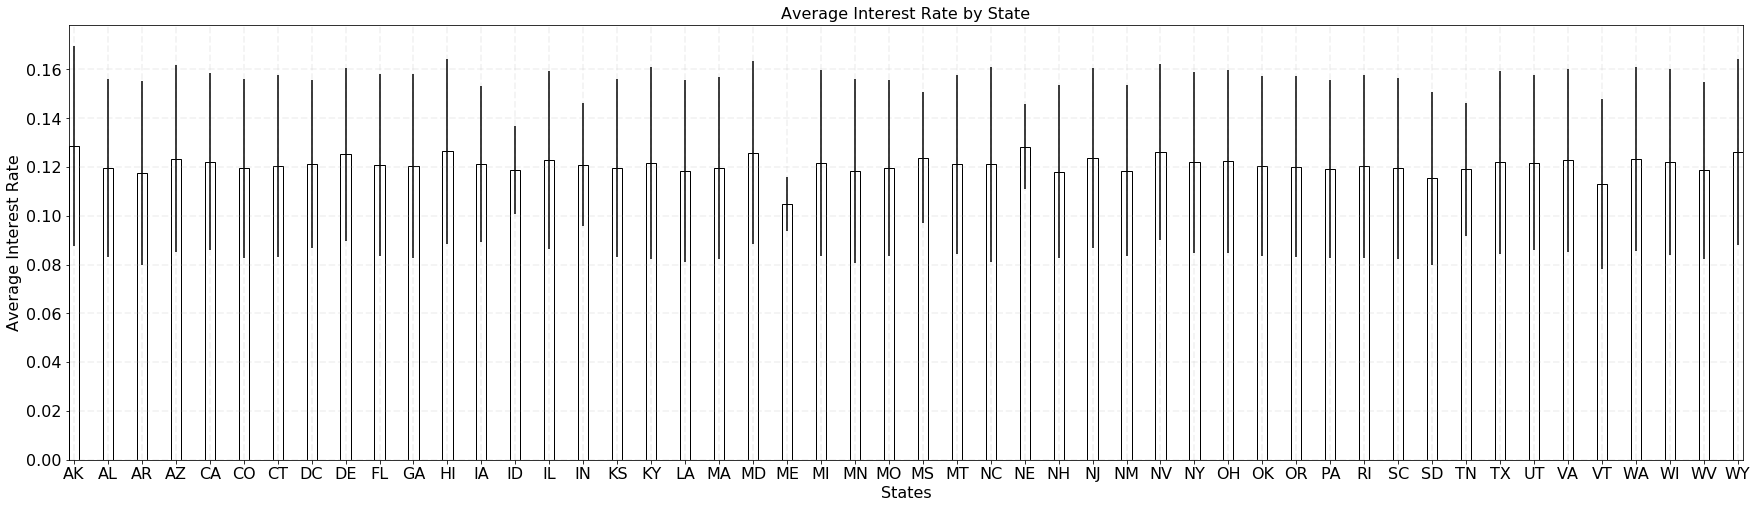

In [70]:
#plot the results

# font size
f_size = 16
x = np.arange(state_groupby.shape[0]); #get x locations for groups
width = 0.3; #width of bars
# make the figure
fig = plt.figure(figsize = (30,8))
ax = plt.subplot(1,1,1) # Create figure object
ax.set_xmargin(0);

ax.bar(x, state_groupby.int_rate['mean'], width=width, yerr=state_groupby.int_rate['std'], color='white', edgecolor='k'); #plot average interest rates by state with error bars as the standard deviation
ax.set_xticks(x); #set locations of tick marks
ax.set_xticklabels(state_groupby.index); #set x labels
# adjust size of labels on axes 
ax.tick_params(labelsize = f_size);
ax.grid(True, lw=1.75, ls='--', alpha=0.15); #include background grid #set axes titles
ax.set_xlabel('States', fontsize=f_size);
ax.set_ylabel('Average Interest Rate', fontsize=f_size);
# set figure title label
ax.set_title('Average Interest Rate by State', fontsize = f_size);
# ax.legend(loc='best', fontsize = f_size);
# plt.show();
plt.savefig('Average_Interest_Rate_by_State.pdf'); #plot for report